In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time # to measure how long the models take
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import joblib
import shap
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import FunctionTransformer

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [131]:
train_data = pd.read_csv('C:/Users/tauny/Desktop/Schulich - School/Classes/Winter 2025 - Semester 3/AI in Business I/Assignments/Ass 1/train.csv', sep=',')

In [132]:
test_data = pd.read_csv('C:/Users/tauny/Desktop/Schulich - School/Classes/Winter 2025 - Semester 3/AI in Business I/Assignments/Ass 1/test.csv', sep=',')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Custom transformer to create the 'family_size' column
class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a new family_size column from 'Parch' and 'SibSp'
        X = X.copy()
        X['family_size'] = X['Parch'] + X['SibSp']
        return X

# Define the preprocessing steps
numeric_features = ['Age']  # We need to process 'Age' column
categorical_features = ['Pclass', 'Embarked', 'Sex']  # Categorical columns to one-hot encode

# Create the transformers for each column
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing 'Age' with mean
    ('scaler', StandardScaler())  # Standard scale the numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing 'Embarked' with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical columns
])

# ColumnTransformer to apply transformers to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline that includes the custom transformer for creating the 'family_size' column
full_pipeline = Pipeline(steps=[
    ('family_size', FamilySizeTransformer()),  # Add the 'family_size' column
    ('preprocessor', preprocessor)  # Apply the transformations defined earlier
])

# Drop only the columns that are not needed before applying the transformations
X_train = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop the unnecessary columns
y_train = X_train.pop('Survived')  # Assuming 'Survived' is the target variable

# Now apply the pipeline for data transformation
X_train_transformed = full_pipeline.fit_transform(X_train)


# You can now apply this to your test set similarly
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop unnecessary columns
y_test = X_test.pop('Survived', None)  # If you have the target variable in test, use it

X_test_transformed = full_pipeline.transform(X_test)

# You can now use X_train_transformed and X_test_transformed with your models


TypeError: DataFrame.pop() takes 2 positional arguments but 3 were given

In [110]:
# Function to create the familySize column
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize']]  # Return only familySize column

# List of columns for each transformation
age_columns = ['Age']
embarked_columns = ['Embarked']
family_size_columns = ['Parch', 'SibSp']
categorical_columns = ['Pclass', 'Sex', 'Embarked']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing 'Age' based on the mean
        ('age', SimpleImputer(strategy='mean'), age_columns),
        
        # Impute missing 'Embarked' with the most frequent value (mode)
        ('embarked', SimpleImputer(strategy='most_frequent'), embarked_columns),
        
        # Create 'familySize' by summing Parch and SibSp
        ('family_size', FunctionTransformer(create_family_size, validate=False), family_size_columns),
        
        # One-Hot Encoding for categorical features like Pclass, Sex, Embarked
        ('encoding', OneHotEncoder(), categorical_columns)
    ])

# Apply the preprocessor to the training data
train_data_transformed = preprocessor.fit_transform(train_data)

# Get the column names for the encoded features
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=categorical_columns)

# Define new column names
all_columns = age_columns + family_size_columns + list(encoded_columns) + ['Survived']

# Convert the transformed data into a DataFrame with proper column names
train_data_df = pd.DataFrame(train_data_transformed, columns=all_columns)

# Display the first few rows of the transformed DataFrame
train_data_df.head()

,Age,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,S,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,C,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,S,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,S,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,S,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [125]:
# Function to create the familySize column (sum of Parch and SibSp)
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize']]  # Return only familySize column

# Columns for transformations
age_columns = ['Age']
embarked_columns = ['Embarked']
family_size_columns = ['Parch', 'SibSp']
categorical_columns = ['Pclass', 'Sex', 'Embarked']
fare_column = ['Fare']
survived_column = ['Survived']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing 'Age' based on the mean
        ('age', SimpleImputer(strategy='mean'), age_columns),
        
        # Impute missing 'Embarked' with the most frequent value (mode)
        ('embarked', SimpleImputer(strategy='most_frequent'), embarked_columns),
        
        # Create 'familySize' by summing Parch and SibSp
        ('family_size', FunctionTransformer(create_family_size, validate=False), family_size_columns),
        
        # One-Hot Encoding for categorical features like Pclass, Sex, Embarked
        ('encoding', OneHotEncoder(drop='first'), categorical_columns)
    ], 
    remainder='passthrough'  # This will keep 'Fare' and 'Survived' as they are
)

# Apply the preprocessor to the training data
train_data_transformed = preprocessor.fit_transform(train_data)

# Check the shape of the transformed data
print(f"Shape of transformed data: {train_data_transformed.shape}")  # Check the number of columns

# Get the column names for the encoded features
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=categorical_columns)

# Define new column names, including all transformed columns (Survived, Fare, familySize should be preserved)
all_columns = age_columns + family_size_columns + list(encoded_columns) + fare_column + survived_column

# Convert the transformed data into a DataFrame with proper column names
train_data_df = pd.DataFrame(train_data_transformed, columns=all_columns)

# Display the first few rows of the transformed DataFrame
train_data_df.head()

Shape of transformed data: (891, 15)


ValueError: Shape of passed values is (891, 15), indices imply (891, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for unknowns
train_data.isin(['unknown']).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Assess if relationship exists between other variables and Survival to inform imputation strategy
train_data.groupby('Survived').describe().T

Survived                    0           1
PassengerId count  549.000000  342.000000
            mean   447.016393  444.368421
            std    260.640469  252.358840
            min      1.000000    2.000000
            25%    211.000000  250.750000
            50%    455.000000  439.500000
            75%    675.000000  651.500000
            max    891.000000  890.000000
Pclass      count  549.000000  342.000000
            mean     2.531876    1.950292
            std      0.735805    0.863321
            min      1.000000    1.000000
            25%      2.000000    1.000000
            50%      3.000000    2.000000
            75%      3.000000    3.000000
            max      3.000000    3.000000
Age         count  424.000000  290.000000
            mean    30.626179   28.343690
            std     14.172110   14.950952
            min      1.000000    0.420000
            25%     21.000000   19.000000
            50%     28.000000   28.000000
            75%     39.000000   36.000000
            max     74.000000   80.000000
SibSp       count  549.000000  342.000000
            mean     0.553734    0.473684
            std      1.288399    0.708688
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      1.000000    1.000000
            max      8.000000    4.000000
Parch       count  549.000000  342.000000
            mean     0.329690    0.464912
            std      0.823166    0.771712
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    1.000000
            max      6.000000    5.000000
Fare        count  549.000000  342.000000
            mean    22.117887   48.395408
            std     31.388207   66.596998
            min      0.000000    0.000000
            25%      7.854200   12.475000
            50%     10.500000   26.000000
            75%     26.000000   57.000000
            max    263.000000  512.329200

Name column can be dropped - it offers no value to the prediction - essentailly an identifier;
Same for passengerId

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Null values contained in Age, Cabin, Embarked.
Let's look at cabin to see what values it does contain to better understand its different variables and potential impact on the output.

In [11]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Since there alot of nulls in Cabin and this seems to possibly be a good indication of survival rate. All of the ticket variables are full - I will check for a correlation to with exisiting cabin columns and ticket number to see if there is a pattern that can be applied to cabin.

In [12]:
# Filter rows where cabin train_data is not missing.
valid_cabin_data = train_data.dropna(subset=['Cabin'])

# Check unique ticket values and their corresponding cabins.
ticket_cabin_data = valid_cabin_data[['Ticket','Cabin']].drop_duplicates()

ticket_cabin_data.head()


,Ticket,Cabin
1,PC 17599,C85
3,113803,C123
6,17463,E46
10,PP 9549,G6
11,113783,C103


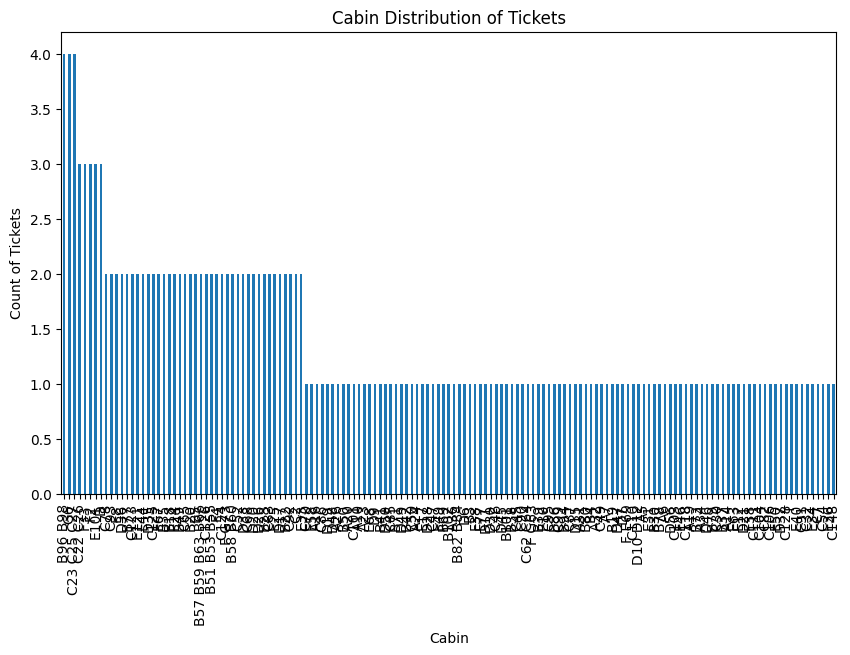

In [13]:
# Plot the count of tickets for each cabin
plt.figure(figsize=(10, 6))
valid_cabin_data['Cabin'].value_counts().plot(kind='bar')
plt.title('Cabin Distribution of Tickets')
plt.xlabel('Cabin')
plt.ylabel('Count of Tickets')
plt.xticks(rotation=90)
plt.show()

C:\Users\tauny\AppData\Local\Temp\ipykernel_31720\1085877550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_cabin_data['TicketPrefix'] = valid_cabin_data['Ticket'].str.extract(r'([A-Za-z]+)', expand=False)


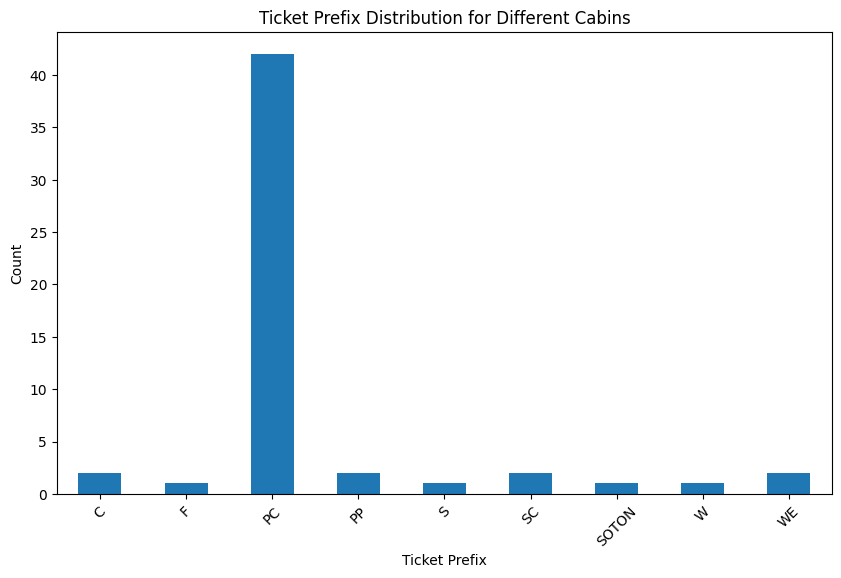

In [14]:
# Convert 'Ticket' to a categorical type and extract prefixes
valid_cabin_data['TicketPrefix'] = valid_cabin_data['Ticket'].str.extract(r'([A-Za-z]+)', expand=False)

# Plot
plt.figure(figsize=(10, 6))
valid_cabin_data.groupby('TicketPrefix').size().plot(kind='bar')
plt.title('Ticket Prefix Distribution for Different Cabins')
plt.xlabel('Ticket Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

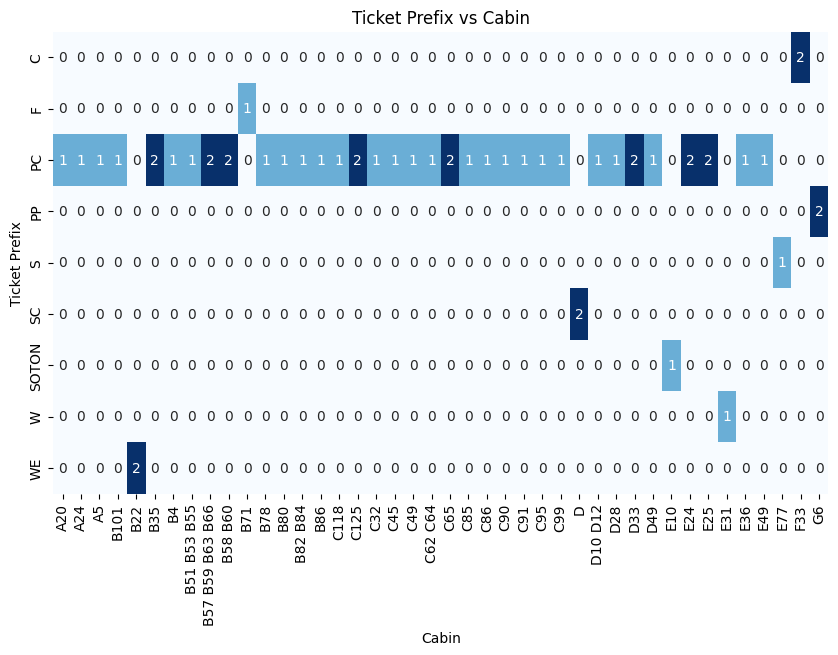

In [15]:
# Create a pivot table of ticket prefixes and cabins
ticket_cabin_pivot = pd.crosstab(valid_cabin_data['TicketPrefix'], valid_cabin_data['Cabin'])

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ticket_cabin_pivot, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ticket Prefix vs Cabin')
plt.xlabel('Cabin')
plt.ylabel('Ticket Prefix')
plt.show()

Theres no meaningful correlations here. Ticket and cabin will be dropped.

To handle age null vals, I will replace them with the mean value according to gender.

Since there are minimal (2 nulls) for embarked - I wll replace them with the most frequently occuring embarkation point.

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Add a column to represent total family size.

In [35]:
# Define function to create familySize column
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize', 'Parch', 'SibSp']]  # Return only familySize column

# Define the column transformer (preprocessing pipeline)
preprocessor = ColumnTransformer(
    transformers=[
        ('age', SimpleImputer(strategy='mean'), ['Age']),  # Impute missing Age with mean
        ('embarked', SimpleImputer(strategy='most_frequent'), ['Embarked']),  # Impute missing Embarked with mode
        ('family_size', FunctionTransformer(create_family_size, validate=False), ['Parch', 'SibSp']),  # Create familySize
        ('encoding', OneHotEncoder(drop='first'), ['Pclass', 'Embarked', 'Sex'])  # OneHotEncode Pclass, Embarked, Sex
    ])

# Assuming you have train_data loaded
train_data_clean = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop unnecessary columns

# Apply the preprocessor to the training data (this step does not involve modeling)
processed_train_data = preprocessor.fit_transform(train_data_clean)

# To make the transformed data back into a DataFrame, we need to get the new column names after transformation
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=['Pclass', 'Embarked', 'Sex'])
family_size_columns = ['familySize']
age_columns = ['Age']
embarked_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Combine column names after transformation
all_columns = age_columns + embarked_columns + family_size_columns + list(encoded_columns)

# Convert the processed data back to a DataFrame with the correct column names
train_df = pd.DataFrame(processed_train_data, columns=all_columns)

# Check the resulting processed data
print(train_df.head())


    Age Embarked_C Embarked_Q Embarked_S familySize Pclass_2 Pclass_3  \
0  22.0          S          1          0          1      0.0      1.0   
1  38.0          C          1          0          1      0.0      0.0   
2  26.0          S          0          0          0      0.0      1.0   
3  35.0          S          1          0          1      0.0      0.0   
4  35.0          S          0          0          0      0.0      1.0   

  Embarked_Q Embarked_S Embarked_nan Sex_male  
0        0.0        1.0          0.0      1.0  
1        0.0        0.0          0.0      0.0  
2        0.0        1.0          0.0      0.0  
3        0.0        1.0          0.0      0.0  
4        0.0        1.0          0.0      1.0  


In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

# Function to create the familySize column
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize']]  # Return only familySize column

# Define the transformer for the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('age', SimpleImputer(strategy='mean'), ['Age']),  # Impute missing 'Age' with the mean
        ('embarked', SimpleImputer(strategy='most_frequent'), ['Embarked']),  # Impute missing 'Embarked' with the mode
        ('family_size', FunctionTransformer(create_family_size, validate=False), ['Parch', 'SibSp']),  # Create 'familySize'
        ('encoding', OneHotEncoder(drop='first', sparse=False), ['Pclass', 'Embarked', 'Sex'])  # One-hot encode categorical variables
    ])

# Apply the preprocessor to the training data
train_data = preprocessor.fit_transform(train_data)

# Convert the processed data back to a DataFrame
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=['Pclass', 'Embarked', 'Sex'])
family_size_columns = ['familySize']
age_columns = ['Age']
embarked_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Combine column names
all_columns = age_columns + embarked_columns + family_size_columns + list(encoded_columns)

# Convert the processed data back to a DataFrame with correct columns
train_data_df = pd.DataFrame(train_data, columns=all_columns)

# Display the resulting DataFrame
train_data_df.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [68]:
# Function to create the familySize column
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize']]  # Return only familySize column

# List of columns for each transformation
age_columns = ['Age']
embarked_columns = ['Embarked']
family_size_columns = ['Parch', 'SibSp']
categorical_columns = ['Pclass', 'Sex', 'Embarked']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing Age based on the mean of each sex group
        ('age', SimpleImputer(strategy='mean'), age_columns),
        
        # Impute missing Embarked with the most frequent value (mode)
        ('embarked', SimpleImputer(strategy='most_frequent'), embarked_columns),
        
        # Create familySize column by summing Parch and SibSp
        ('family_size', FunctionTransformer(create_family_size, validate=False), family_size_columns),
        
        # One-Hot Encoding for categorical features like Pclass and Sex
        ('encoding', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

# Apply the preprocessor to the training data
train_data_transformed = preprocessor.fit_transform(train_data)

# Retrieve column names for the encoded features
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=categorical_columns)

# Define new column names
all_columns = age_columns + family_size_columns + list(encoded_columns)

# Convert the transformed data into a DataFrame with proper column names
train_data_df = pd.DataFrame(train_data_transformed, columns=all_columns)

# Display the first few rows of the transformed DataFrame
train_data_df.head()

,Age,Parch,SibSp,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,S,1,0.0,1.0,1.0,0.0,1.0,0.0
1,38.0,C,1,0.0,0.0,0.0,0.0,0.0,0.0
2,26.0,S,0,0.0,1.0,0.0,0.0,1.0,0.0
3,35.0,S,1,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,S,0,0.0,1.0,1.0,0.0,1.0,0.0


In [95]:
# Function to create the familySize column
def create_family_size(df):
    df['familySize'] = df['Parch'] + df['SibSp']
    return df[['familySize']]  # Return only familySize column



# List of columns for each transformation
embarked_columns = ['Embarked']
family_size_columns = ['Parch', 'SibSp']
categorical_columns = ['Pclass', 'Sex', 'Embarked']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing 'Age' based on the mean of each sex group
        ('age', SimpleImputer(strategy='mean'), age_columns),
        
        # Impute missing 'Embarked' with the most frequent value (mode)
        ('embarked', SimpleImputer(strategy='most_frequent'), embarked_columns),
        
        # Create 'familySize' by summing Parch and SibSp
        ('family_size', FunctionTransformer(create_family_size, validate=False), family_size_columns),
                
        # One-Hot Encoding for categorical features like Pclass, Sex, Embarked
        ('encoding', OneHotEncoder(), categorical_columns)
    ])

# Apply the preprocessor to the training data
train_data_transformed = preprocessor.fit_transform(train_data)

# Get the column names for the encoded features
encoded_columns = preprocessor.transformers_[3][1].get_feature_names_out(input_features=categorical_columns)

# Define new column names
all_columns = age_columns + family_size_columns + list(encoded_columns) 

# Convert the transformed data into a DataFrame with proper column names
train_data_df = pd.DataFrame(train_data_transformed, columns=all_columns)

# Display the first few rows of the transformed DataFrame
train_data_df.head()

,Age,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,S,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,C,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,S,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,S,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,S,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
# Impute missing 'Age' with the mean for each 'Sex' group
age_imputer = SimpleImputer(strategy='mean')
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])

# Check if any missing values are left
print(train_data['Age'].isna().sum())

0


In [47]:
# Impute missing 'Embarked' with the mode (most frequent value)
embarked_imputer = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = embarked_imputer.fit_transform(train_data[['Embarked']]).flatten()

# Check if any missing values are left
print(train_data['Embarked'].isna().sum())

0


In [61]:
# Check shape and encoded columns
print(encoded_columns.shape)

(6,)


In [60]:
# One-Hot Encoding for 'Pclass', 'Embarked', 'Sex'
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(train_data[['Pclass', 'Embarked', 'Sex']])

# Check shape and encoded columns
print(encoded_columns.shape)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [272]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [274]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,familySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,0,1,0,0,1,0,1


In [275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   familySize  891 non-null    int64  
 6   Pclass_1    891 non-null    int32  
 7   Pclass_2    891 non-null    int32  
 8   Pclass_3    891 non-null    int32  
 9   Embarked_C  891 non-null    int32  
 10  Embarked_Q  891 non-null    int32  
 11  Embarked_S  891 non-null    int32  
 12  Sex_female  891 non-null    int32  
 13  Sex_male    891 non-null    int32  
dtypes: float64(2), int32(8), int64(4)
memory usage: 69.7 KB


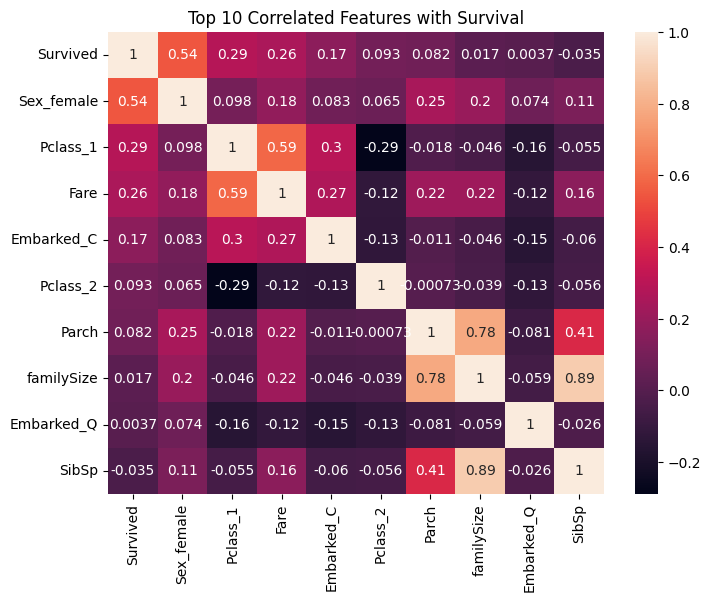

In [276]:
# Correlation matrix for top 10 correlated variables with NPS Score
corr = train_data.corr()['Survived'].sort_values(ascending=False).head(10)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(train_data[corr.index].corr(), annot=True)
plt.title('Top 10 Correlated Features with Survival')
plt.show()

In [277]:
# Collinearity exists between familySize and SibSp (expected) because this column was made from these variables; as well familySize and Parch

In [278]:
train_data.corr()

,Survived,Age,SibSp,Parch,Fare,familySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Survived,1.000000,-0.080453,-0.035322,0.081629,0.257307,0.016639,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,0.543351,-0.543351
Age,-0.080453,1.000000,-0.236920,-0.182556,0.089079,-0.253129,0.319107,0.006346,-0.280109,0.031797,-0.019970,-0.015289,-0.103236,0.103236
SibSp,-0.035322,-0.236920,1.000000,0.414838,0.159651,0.890712,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,0.081629,-0.182556,0.414838,1.000000,0.216225,0.783111,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,0.257307,0.089079,0.159651,0.216225,1.000000,0.217138,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,0.182333,-0.182333
familySize,0.016639,-0.253129,0.890712,0.783111,0.217138,1.000000,-0.046114,-0.038594,0.071142,-0.046215,-0.058592,0.077359,0.200988,-0.200988
Pclass_1,0.285904,0.319107,-0.054582,-0.017633,0.591711,-0.046114,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,0.098013,-0.098013
Pclass_2,0.093349,0.006346,-0.055932,-0.000734,-0.118557,-0.038594,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,0.064746,-0.064746
Pclass_3,-0.322308,-0.280109,0.092548,0.015790,-0.413333,0.071142,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,-0.137143,0.137143
Embarked_C,0.168240,0.031797,-0.059528,-0.011069,0.269335,-0.046215,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,0.082853,-0.082853


In [279]:
corr_matrix = train_data.corr()

# Sort the correlations by absolute value to find the strongest correlations
sorted_corr = corr_matrix.unstack().sort_values(ascending=False, key=abs)

# Filter out the 1s (correlations with itself)
sorted_corr = sorted_corr[sorted_corr != 1]

# Print the full correlation series
print(sorted_corr.to_string())

Sex_male    Sex_female   -1.000000
Sex_female  Sex_male     -1.000000
familySize  SibSp         0.890712
SibSp       familySize    0.890712
Parch       familySize    0.783111
familySize  Parch         0.783111
Embarked_S  Embarked_C   -0.782742
Embarked_C  Embarked_S   -0.782742
Pclass_1    Pclass_3     -0.626738
Pclass_3    Pclass_1     -0.626738
Fare        Pclass_1      0.591711
Pclass_1    Fare          0.591711
Pclass_3    Pclass_2     -0.565210
Pclass_2    Pclass_3     -0.565210
Sex_male    Survived     -0.543351
Survived    Sex_male     -0.543351
Sex_female  Survived      0.543351
Survived    Sex_female    0.543351
Embarked_Q  Embarked_S   -0.499421
Embarked_S  Embarked_Q   -0.499421
Parch       SibSp         0.414838
SibSp       Parch         0.414838
Fare        Pclass_3     -0.413333
Pclass_3    Fare         -0.413333
            Survived     -0.322308
Survived    Pclass_3     -0.322308
Pclass_1    Age           0.319107
Age         Pclass_1      0.319107
Embarked_C  Pclass_1

In [280]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Check the correlation of each variable with Survived
survival_corr = corr_matrix['Survived'].sort_values(ascending=False)

# Display the correlations
print(survival_corr)

Survived      1.000000
Sex_female    0.543351
Pclass_1      0.285904
Fare          0.257307
Embarked_C    0.168240
Pclass_2      0.093349
Parch         0.081629
familySize    0.016639
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.080453
Embarked_S   -0.149683
Pclass_3     -0.322308
Sex_male     -0.543351
Name: Survived, dtype: float64


These results appear accurate and make sense because it is likely that first class passengers, who paid high fares, had a higher liklihood of survival. - likely proximity to first deck level and boat access. It is also correct that male and third class passengers were the least likely to survive. 

Further exploring vriables

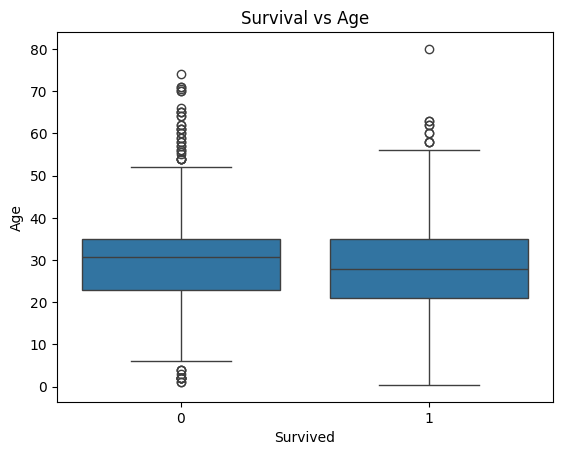

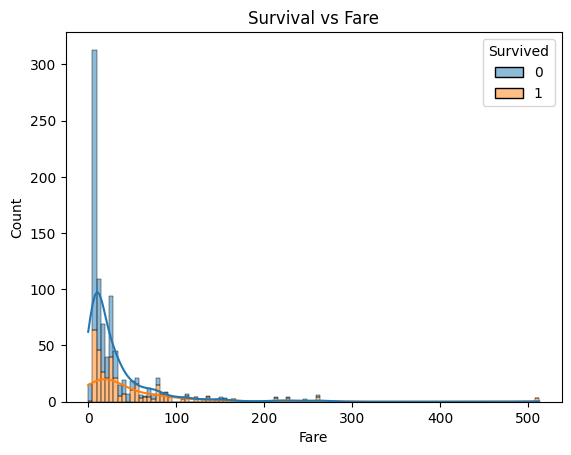

In [281]:
# Boxplot for Age vs Survived
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Survival vs Age')
plt.show()

# Histogram for Fare vs Survived
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Survival vs Fare')
plt.show()

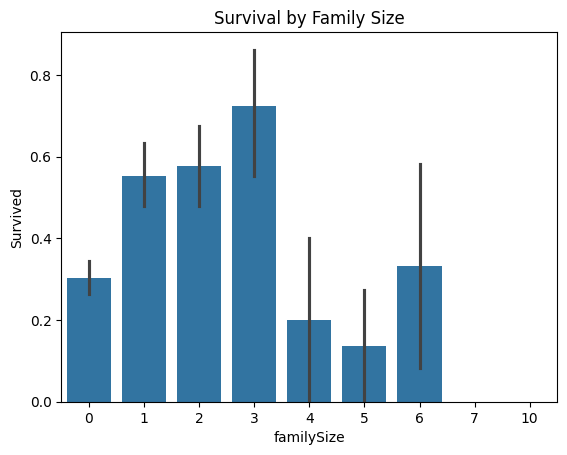

In [282]:
# Correlation of Family Size with Survival
sns.barplot(x='familySize', y='Survived', data=train_data)
plt.title('Survival by Family Size')
plt.show()

In [283]:
age_data = train_data

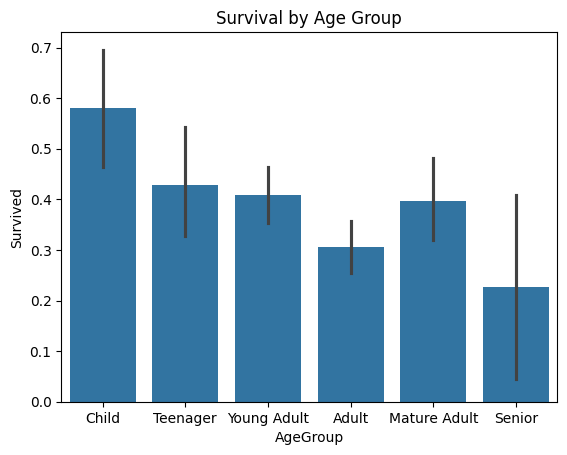

In [284]:
# Create Age Group Categories
bins = [0, 12, 18, 29, 39, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Mature Adult', 'Senior']
age_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels)

# Barplot for Age Group vs Survived
sns.barplot(x='AgeGroup', y='Survived', data=age_data)
plt.title('Survival by Age Group')
plt.show()

In [285]:
# Calculate average, highest, and lowest fare
average_fare = train_data['Fare'].mean()
highest_fare = train_data['Fare'].max()
lowest_fare = train_data['Fare'].min()

# Print the results
print(f"Average Fare: {average_fare}")
print(f"Highest Fare: {highest_fare}")
print(f"Lowest Fare: {lowest_fare}")

Average Fare: 32.204207968574636
Highest Fare: 512.3292
Lowest Fare: 0.0


In [286]:
Fare_data = train_data

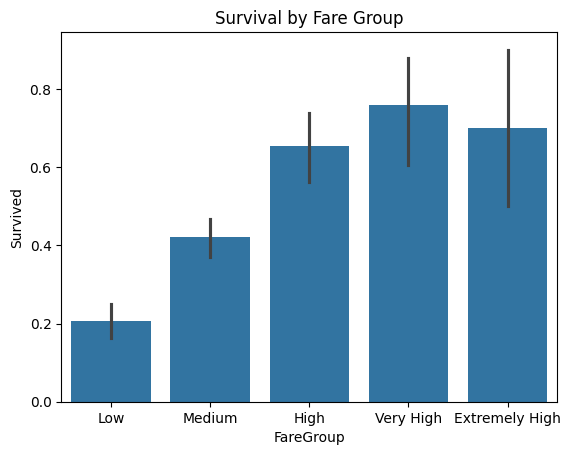

In [287]:
# Create Fare Groups
fare_bins = [0, 10, 50, 100, 200, 1000]
fare_labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
Fare_data['FareGroup'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)

# Barplot for Fare Group vs Survived
sns.barplot(x='FareGroup', y='Survived', data=Fare_data)
plt.title('Survival by Fare Group')
plt.show()

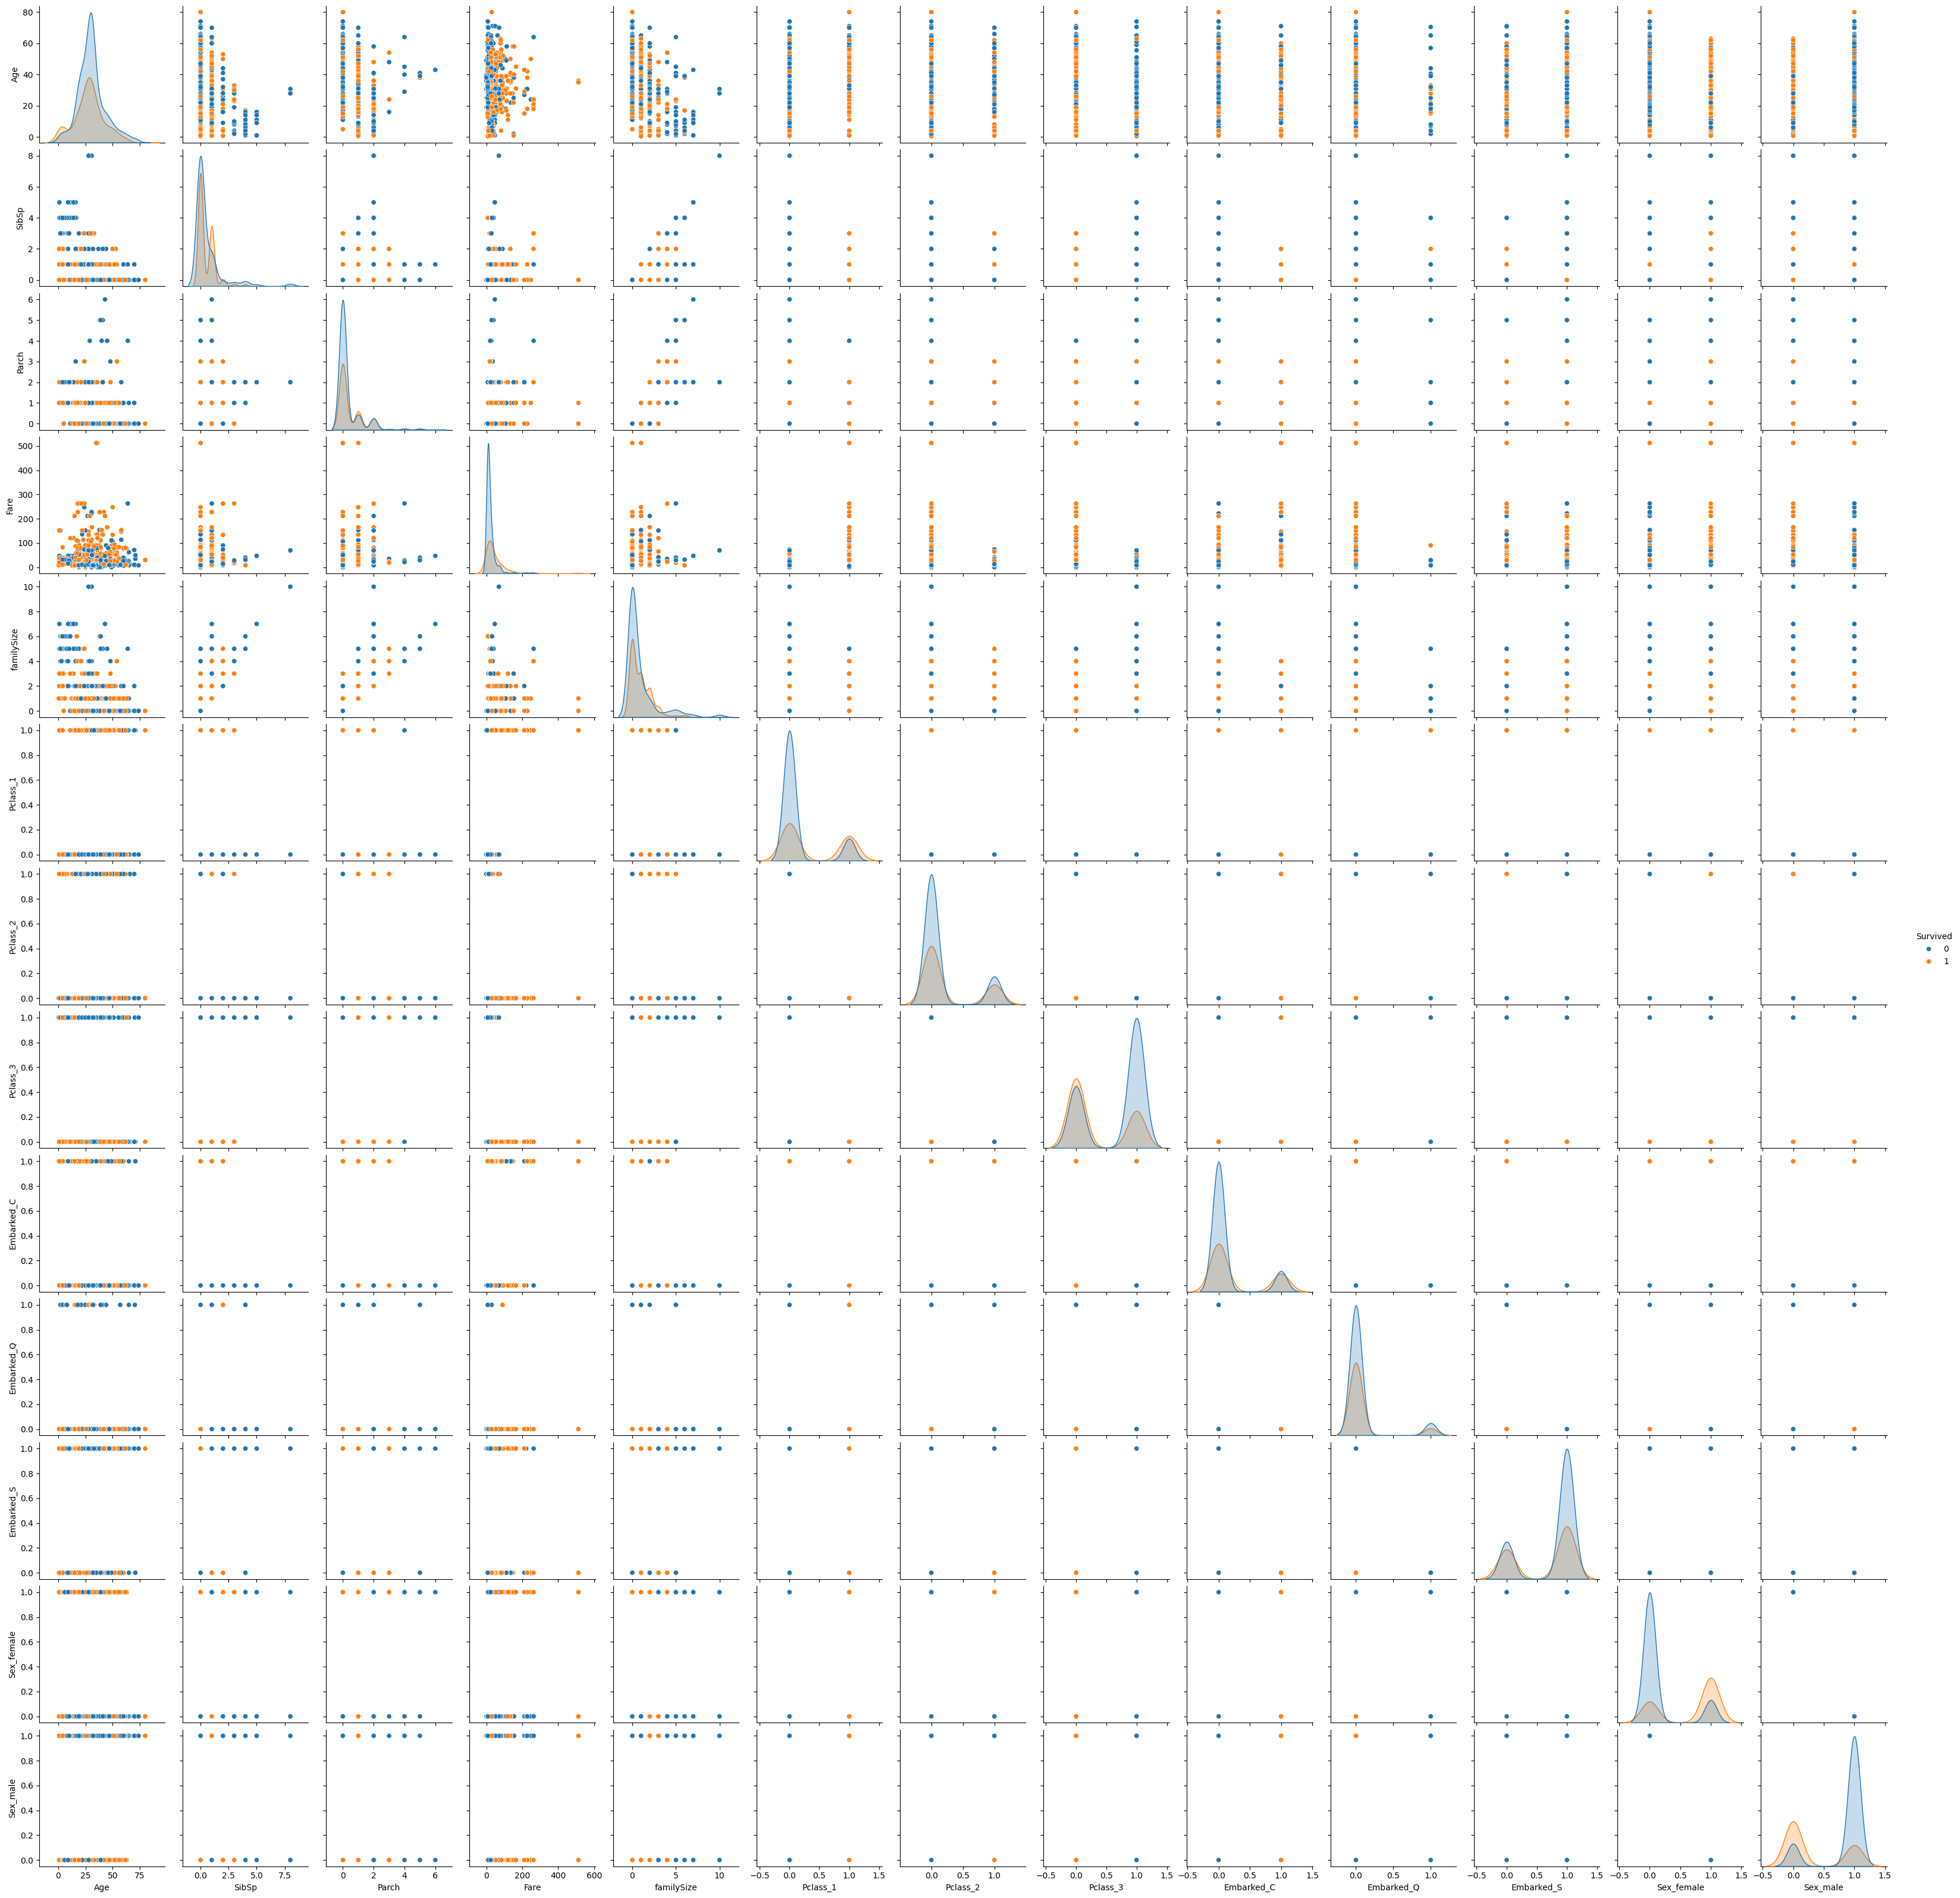

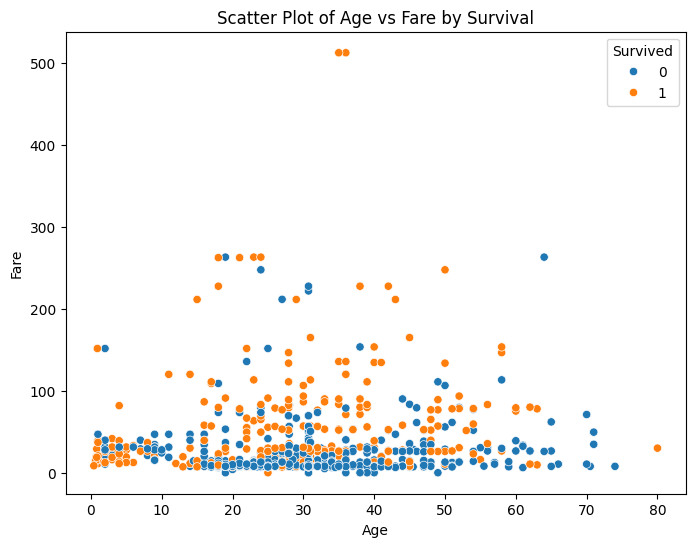

In [288]:
# Pairplot to see relationships between features
sns.pairplot(train_data, hue="Survived")
plt.show()

# Scatter plot for a single variable against Survived
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.show()

In [289]:
# Separate target variable (Survived) and features
X = train_data.drop(['Survived', 'AgeGroup', 'FareGroup'], axis=1) # Features
y = train_data['Survived'] # Target

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Age         891 non-null    float64 
 2   SibSp       891 non-null    int64   
 3   Parch       891 non-null    int64   
 4   Fare        891 non-null    float64 
 5   familySize  891 non-null    int64   
 6   Pclass_1    891 non-null    int32   
 7   Pclass_2    891 non-null    int32   
 8   Pclass_3    891 non-null    int32   
 9   Embarked_C  891 non-null    int32   
 10  Embarked_Q  891 non-null    int32   
 11  Embarked_S  891 non-null    int32   
 12  Sex_female  891 non-null    int32   
 13  Sex_male    891 non-null    int32   
 14  AgeGroup    891 non-null    category
 15  FareGroup   876 non-null    category
dtypes: category(2), float64(2), int32(8), int64(4)
memory usage: 71.9 KB


# MODELS

In [291]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
# Models to compare

models = {
    'knn': KNeighborsClassifier(n_neighbors=10),
    'log_reg': LogisticRegression(),
    'dt': DecisionTreeClassifier(max_depth=20),
    'rf': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    'bag': BaggingClassifier(),
    'svm': SVC(),
    'gb': GradientBoostingClassifier(),  # Gradient Boosting
    'xgb': XGBClassifier()  # XGBoost
}

In [293]:
print(type(models['gb']))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [294]:
# Loop through the models, fit and evaluate with cross-validation
for name, model in models.items():
 
    # Fit model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
     
    # Print test set evaluation
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'{name} Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---------------------------------------')

knn Accuracy: 0.7263
knn Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       105
           1       0.76      0.50      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179

knn Confusion Matrix:
[[93 12]
 [37 37]]
---------------------------------------


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


log_reg Accuracy: 0.7989
log_reg Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

log_reg Confusion Matrix:
[[90 15]
 [21 53]]
---------------------------------------
dt Accuracy: 0.7654
dt Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

dt Confusion Matrix:
[[83 22]
 [20 54]]
---------------------------------------
rf Accuracy: 0.8324
rf Classification Report:
              precision    recall

RF perfomrs best. - hypertune using grid search to get best params; review feature importance for values to drop from final model
Gradient Boosting
Logistic Regrerssion

In [295]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [296]:
# Save the best model using joblib
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [297]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



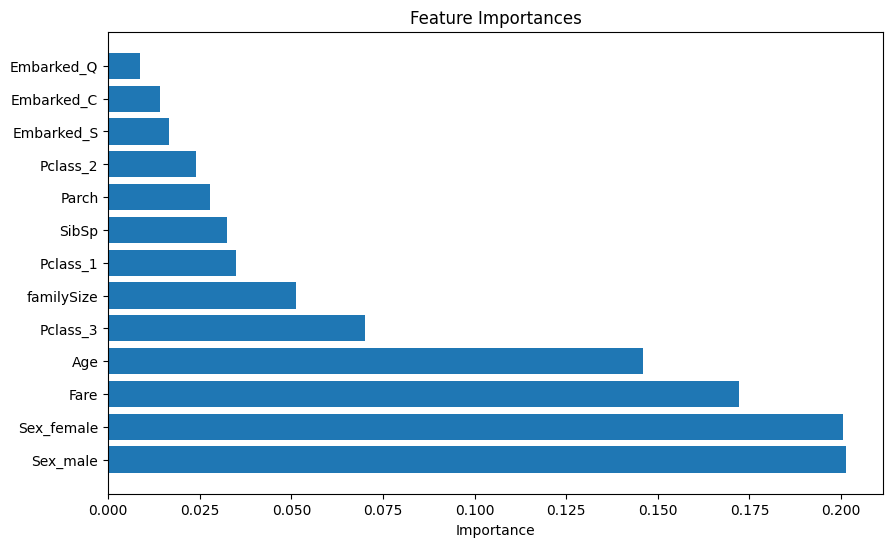

In [298]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Top features here:
- Sex (maybe multi collinearity -drop)
- Fare
- Age
- pclass_3
- family size
- pclass_1

In [299]:
print(shap_values[1].shape)

(13,)


In [300]:
print(X_test.shape) 

(179, 13)


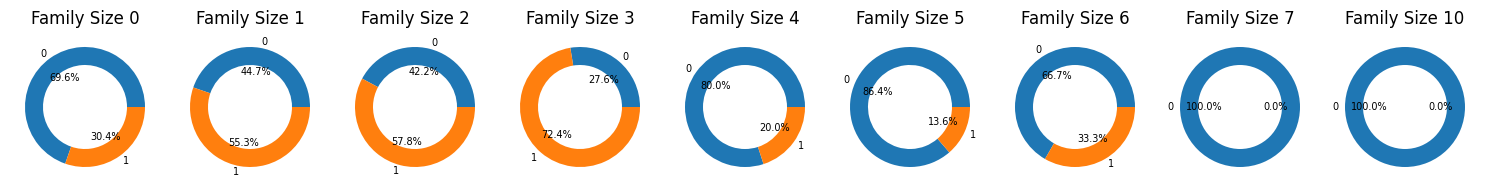

In [301]:
# Create subplots, set number of rows and columns based on the number of unique family sizes
fig, axes = plt.subplots(1, len(family_survival_sex), figsize=(15, 5))  # Adjust size as needed

# Plotting pie charts for each family size on the same row
for i, family in enumerate(family_survival_sex.index):
    family_data = family_survival_sex.loc[family] # type: ignore
    family_data.plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=f'Family Size {family}', fontsize=7, 
                     wedgeprops={'width': 0.3})  # Adjust wedge size for compactness
    axes[i].set_ylabel('')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [302]:
# Next best model - GB

# Define the model
gb_model = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.8, 1.0],  # Fraction of samples used to fit each base learner
    'min_samples_split': [2, 5, 10]  # The minimum number of samples required to split an internal node
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Make predictions with the best model
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.8328178863390132
Accuracy on test set: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[95 10]
 [24 50]]


<class 'numpy.ndarray'>
179


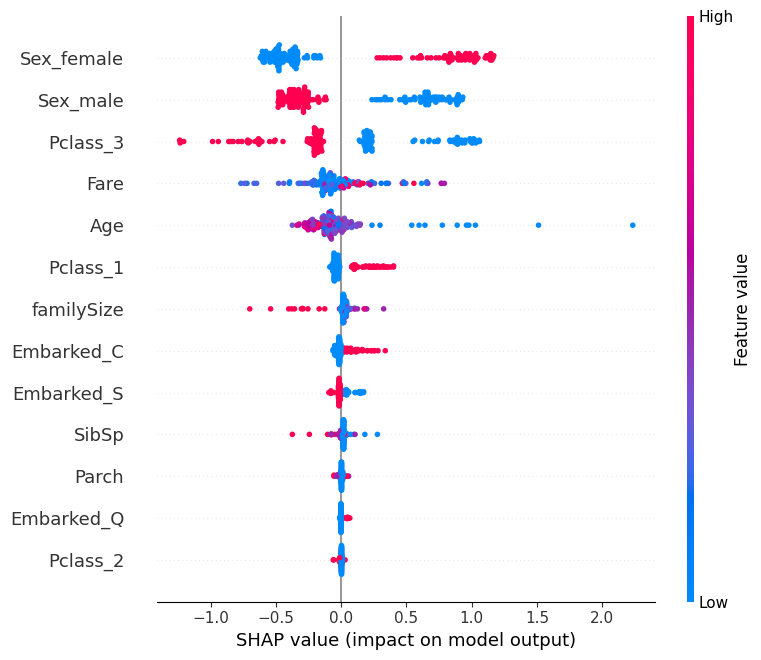

In [303]:
# Use TreeExplainer to explain the Gradient Boosting model
explainer = shap.TreeExplainer(best_gb_model)

# Get the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Check the structure of shap_values
print(type(shap_values))  # Should show list
print(len(shap_values))  # Should show 2 for binary classification

if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Class 1 for survival

# Now plot the SHAP values for class 1 (survival) as a summary plot
shap.summary_plot(shap_values, X_test)

Top Featuers Here:
- same as rf model

In [304]:
# Check correlation between gender_female and gender_male
correlation = train_data[['Sex_female', 'Sex_male']].corr()
print(correlation)

            Sex_female  Sex_male
Sex_female         1.0      -1.0
Sex_male          -1.0       1.0


In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the dataset
X = add_constant(train_data[['Sex_female', 'Sex_male']])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      Feature  VIF
0       const  0.0
1  Sex_female  inf
2    Sex_male  inf


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Gender is Perfectly linear with each other - dropping gender_male in final model to reduce redundancy.
Based on models feature improtance so far dropping also: Embarked_Q, Pclass_2, Embarked_S, Pclass1

In [306]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to use
    'max_iter': [100, 200, 300]  # Maximum number of iterations for convergence
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Set up the GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Evaluate on the test set with the best model
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.801920614596671
Test set accuracy: 0.7932960893854749
Accuracy on test set: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[91 14]
 [23 51]]


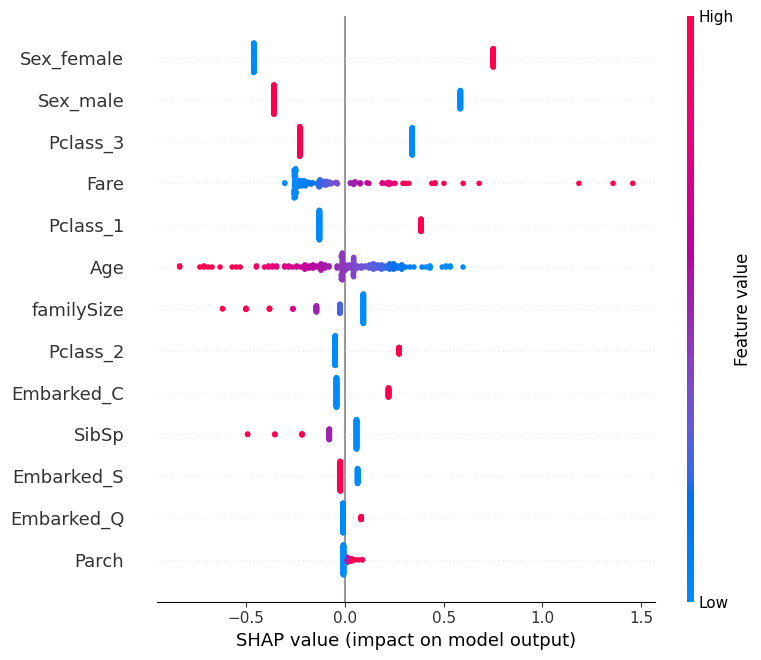

In [307]:
# Use SHAP's LinearExplainer for Logistic Regression
explainer = shap.LinearExplainer(best_logreg_model, X_train)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)  # X_test is your test data

Features to Drop from final x,y
- Sex_male
- Parch
- SibSp
- pclass_2
- family size

Since marked and pclass play different roles in each of the 3 models, but are colinear so i will drop the two least valuable of each feature (EMbarked_Q, Emarked_s, pclass_1 and PClass_2).

Checking for confirm colinearity.

In [308]:
# Select relevant columns (dummies)
pclass_columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']
embarked_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Combine the columns for analysis
X = pd.concat([train_data[pclass_columns], train_data[embarked_columns]], axis=1)

# Add constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIFs
print(vif_data)

      Feature           VIF
0       const  0.000000e+00
1    Pclass_1           inf
2    Pclass_2           inf
3    Pclass_3           inf
4  Embarked_C  3.993968e+04
5  Embarked_Q  4.170691e+08
6  Embarked_S  2.345784e+02


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Pclass if perfectly colinear.

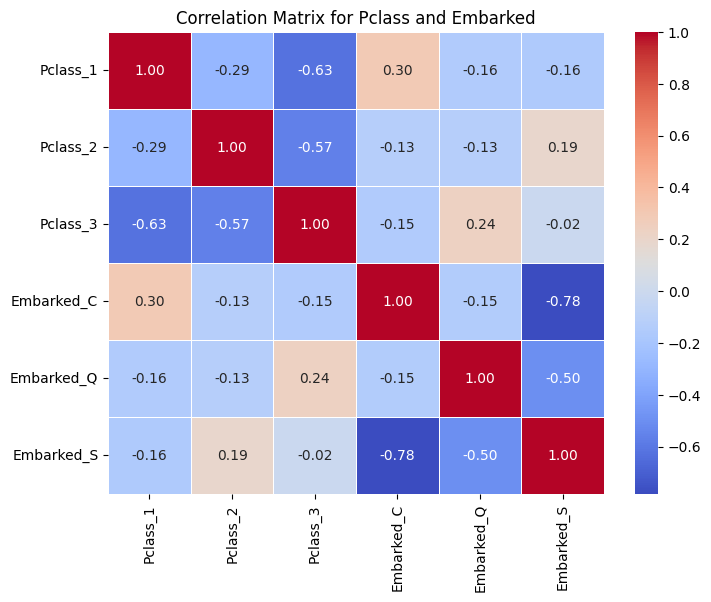

In [309]:
# Calculate correlation matrix for Pclass and Embarked dummies
corr_matrix = X.drop('const', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Pclass and Embarked')
plt.show()

PClass and Embarked categroies are largly negatively correlated.

In [310]:
# Separate target variable (Survived) and features
X = train_data.drop(['Survived', 'AgeGroup', 'FareGroup', 'SibSp', 'Parch', 'Sex_male', 'Pclass_2', 'SibSp', 'Embarked_Q', 'Embarked_S', 'Pclass_1','Parch'], axis=1) # Features
y = train_data['Survived'] # Target

In [311]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
# Basic Data Description
print("Data description")
print("-----------------")
print(f"Number of examples")
print(f"train: {len(X_train)}")
print(f"test: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of examples per class")
print(f"class 0: {y_train.value_counts()[0]}")
print(f"class 1: {y_train.value_counts()[1]}")
print("\n")

# Descriptive Statistics
print("Descriptive statistics")
print("-----------------------")
print(X_train.describe())

Data description
-----------------
Number of examples
train: 712
test: 179
Number of features: 6
Number of examples per class
class 0: 444
class 1: 268


Descriptive statistics
-----------------------
              Age        Fare  familySize    Pclass_3  Embarked_C  Sex_female
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean    29.590245   32.586276    0.932584    0.558989    0.175562    0.344101
std     13.007451   51.969529    1.682525    0.496857    0.380714    0.475408
min      0.420000    0.000000    0.000000    0.000000    0.000000    0.000000
25%     22.000000    7.925000    0.000000    0.000000    0.000000    0.000000
50%     30.000000   14.454200    0.000000    1.000000    0.000000    0.000000
75%     35.000000   30.500000    1.000000    1.000000    0.000000    1.000000
max     80.000000  512.329200   10.000000    1.000000    1.000000    1.000000


Adjusting the best model gridsearch params to try for better output

In [313]:
# Models to compare

models = {
    'knn': KNeighborsClassifier(n_neighbors=10),
    'log_reg': LogisticRegression(),
    'dt': DecisionTreeClassifier(max_depth=20),
    'rf': RandomForestClassifier(),
    'ada': AdaBoostClassifier(),
    'bag': BaggingClassifier(),
    'svm': SVC(),
    'gb': GradientBoostingClassifier(),  # Gradient Boosting
    'xgb': XGBClassifier()  # XGBoost
}

In [314]:
# Loop through the models, fit and evaluate with cross-validation
for name, model in models.items():
 
    # Fit model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
     
    # Print test set evaluation
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'{name} Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---------------------------------------')

knn Accuracy: 0.7151
knn Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       105
           1       0.73      0.49      0.59        74

    accuracy                           0.72       179
   macro avg       0.72      0.68      0.68       179
weighted avg       0.72      0.72      0.70       179

knn Confusion Matrix:
[[92 13]
 [38 36]]
---------------------------------------
log_reg Accuracy: 0.7989
log_reg Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

log_reg Confusion Matrix:
[[92 13]
 [23 51]]
---------------------------------------
dt Accuracy: 0.7654
dt Classification Report:
              precision    rec

RF, Bag, and GB models perform well on new variables.

Grid Search for best params

In [315]:
# Define the models
rf = RandomForestClassifier()
bag = BaggingClassifier()
gb = GradientBoostingClassifier()

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_bag = {
    'n_estimators': [100, 200],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform grid search for each model
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_bag = GridSearchCV(bag, param_grid_bag, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit each grid search
grid_rf.fit(X_train, y_train)
grid_bag.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Get the best models
best_rf = grid_rf.best_estimator_
best_bag = grid_bag.best_estimator_
best_gb = grid_gb.best_estimator_

# Evaluate each model on the test set
print("Random Forest Best Model Accuracy: ", accuracy_score(y_test, best_rf.predict(X_test)))
print("Bagging Best Model Accuracy: ", accuracy_score(y_test, best_bag.predict(X_test)))
print("Gradient Boosting Best Model Accuracy: ", accuracy_score(y_test, best_gb.predict(X_test)))

# Save the best models using joblib
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(best_bag, 'best_bag_model.pkl')
joblib.dump(best_gb, 'best_gb_model.pkl')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Best Model Accuracy:  0.8379888268156425
Bagging Best Model Accuracy:  0.8100558659217877
Gradient Boosting Best Model Accuracy:  0.8268156424581006


['best_gb_model.pkl']

RF model slightly improved in accruacy.
Changing grid search params to see if better output.

In [316]:
# Define the models
rf = RandomForestClassifier()
bag = BaggingClassifier()
gb = GradientBoostingClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5]
}

param_grid_bag = {
    'n_estimators': [100, 200, 500],
    'max_samples': [0.5, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.7, 0.8, 1.0]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, 15]
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_bag = GridSearchCV(bag, param_grid_bag, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit models
grid_rf.fit(X_train, y_train)
grid_bag.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Best parameters for each model
print(f"Best params for RF: {grid_rf.best_params_}")
print(f"Best params for Bagging: {grid_bag.best_params_}")
print(f"Best params for GB: {grid_gb.best_params_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params for RF: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best params for Bagging: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 500}
Best params for GB: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [317]:
# Get the best models
best_rf_1 = grid_rf.best_estimator_
best_bag_1 = grid_bag.best_estimator_
best_gb_1 = grid_gb.best_estimator_

# Evaluate each model on the test set
print("Random Forest Best Model Accuracy: ", accuracy_score(y_test, best_rf.predict(X_test)))
print("Bagging Best Model Accuracy: ", accuracy_score(y_test, best_bag.predict(X_test)))
print("Gradient Boosting Best Model Accuracy: ", accuracy_score(y_test, best_gb.predict(X_test)))

# Save the best models using joblib
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(best_bag, 'best_bag_model.pkl')
joblib.dump(best_gb, 'best_gb_model.pkl')

Random Forest Best Model Accuracy:  0.8379888268156425
Bagging Best Model Accuracy:  0.8100558659217877
Gradient Boosting Best Model Accuracy:  0.8268156424581006


['best_gb_model.pkl']

In [318]:
# Load the models
best_rf = joblib.load('best_rf_model.pkl')
best_bag = joblib.load('best_bag_model.pkl')
best_gb = joblib.load('best_gb_model.pkl')

# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return accuracy, f1, auc

# Evaluate each model
rf_accuracy, rf_f1, rf_auc = evaluate_model(best_rf, X_test, y_test)
bag_accuracy, bag_f1, bag_auc = evaluate_model(best_bag, X_test, y_test)
gb_accuracy, gb_f1, gb_auc = evaluate_model(best_gb, X_test, y_test)

# Print the results
print("Results")
print("-------")
print(f"Model 1: best_rf")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"AUC: {rf_auc:.4f}")
print()
print(f"Model 2: best_bag")
print(f"Accuracy: {bag_accuracy:.4f}")
print(f"F1-score: {bag_f1:.4f}")
print(f"AUC: {bag_auc:.4f}")
print()
print(f"Model 3: best_gb")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"F1-score: {gb_f1:.4f}")
print(f"AUC: {gb_auc:.4f}")

Results
-------
Model 1: best_rf
Accuracy: 0.8380
F1-score: 0.7883
AUC: 0.8990

Model 2: best_bag
Accuracy: 0.8101
F1-score: 0.7500
AUC: 0.8910

Model 3: best_gb
Accuracy: 0.8268
F1-score: 0.7669
AUC: 0.8819


Ensemble

In [319]:
# Define base models (the best models)
base_learners = [
    ('best_rf', best_rf),
    ('best_bag', best_bag),
    ('best_gb', best_gb)
]

# Define the meta-model (log reg had good performance in prior outputs so i'll use it here)
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
accuracy = stacked_model.score(X_test, y_test)
print(f'Stacked Model Accuracy: {accuracy}')

y_pred = stacked_model.predict(X_test)
print(f'F1-score: {classification_report(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])}')

Stacked Model Accuracy: 0.8268156424581006
F1-score:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

AUC: 0.9033462033462034


The stacked model will be used in the final, it combines all 3 good models 

Final models to use with be stacked_model, best_rf, and best_gb.

In [345]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [322]:
test_data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [349]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


My #$%^$@^*$@^@$ pipeline. Sorry prof - i need to learn this better.

I'm just oging to manually proess the new data. - pipeline taking me too long to not work :)

Transforming Test Data

In [326]:
# Fill in missing values for Age
test_data['Age'] = train_data['Age'].fillna(train_data.groupby('Sex')['Age'].transform('mean'))

# Replace missing Embarked values with the mode (most frequent value)
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Creat familySize column
test_data['familySize'] = test_data['Parch'] + test_data['SibSp']

# Handle categroical variables
test_data = pd.get_dummies(test_data, columns=['Pclass','Embarked','Sex'], dtype=int)


KeyError: 'Sex'

Define dependant and independant variables.

In [ ]:
feature_names = test_data.columns.tolist()

In [ ]:
# Sample data (train_data) split
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target variable